In [37]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [38]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [143]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')
events.replace({'condition': {'Muito Bom': 'Muy bien', 'Bom': 'Bien','Novo' : 'Nuevo', 'Bom - Sem Touch ID' : 'Bien - sin touch ID'}},  inplace = True)
events['dia'] = events['timestamp'].dt.day
events['mes'] = events['timestamp'].dt.month


In [54]:
events.replace({'color': {'Preto': 'Negro', 'Dourado': 'Dorado','Cinza espacial' : 'Gris espacial', 'Branco' : 'Blanco', 'Prateado' : 'Plateado', 'Ouro Rosa' : 'Rosa Oro', 
                          'Cinza' : 'Gris', 'Rojo Oscuro' : ''}},  inplace = True)

In [41]:
events['person'].isnull().value_counts()

False    1011288
Name: person, dtype: int64

In [42]:
events['event'].value_counts() 

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

# Visitas desde los dispositivos

In [43]:
total_device_month = events.loc[:, ['device_type','timestamp']]
total_device_month['timestamp'] = total_device_month['timestamp'].dt.month
total_device_month['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

## Despreciamos los unknown ya que son muy pocos


In [44]:
total_device_month = events.loc[(events['device_type']  == 'Smartphone') | (events['device_type']  == 'Computer') | (events['device_type']  == 'Tablet'), ['timestamp']]
total_device_month['timestamp'] = total_device_month['timestamp'].dt.month
mobile_month = events.loc[(events['device_type']  == 'Smartphone') | (events['device_type']  == 'Tablet'), ['timestamp']]
computer_month = events.loc[events['device_type']  == 'Computer', ['timestamp']]
computer_month['timestamp'] = computer_month['timestamp'].dt.month
mobile_month['timestamp'] = mobile_month['timestamp'].dt.month
mobile_month['timestamp'].value_counts()

5    20834
6    12023
4     6232
3     3706
2     1472
1     1206
Name: timestamp, dtype: int64

In [45]:
computer_month['timestamp'].value_counts()

5    19241
6    10365
4     6398
3     3541
2     1318
1      927
Name: timestamp, dtype: int64

In [46]:
total_device_month['timestamp'].value_counts()

5    40075
6    22388
4    12630
3     7247
2     2790
1     2133
Name: timestamp, dtype: int64

In [47]:
months_cantidad = pd.DataFrame({'total':total_device_month['timestamp'].value_counts(),'mobile':mobile_month['timestamp'].value_counts(),'computer':computer_month['timestamp'].value_counts()})
months_cantidad['mobile'] = months_cantidad['mobile']/months_cantidad['total'] * 100
months_cantidad['computer'] = months_cantidad['computer']/months_cantidad['total'] * 100
months_cantidad.sort_index(ascending= False, inplace= True)
months_cantidad.drop('total',axis='columns',inplace = True)
months_cantidad

,mobile,computer
6,53.702877,46.297123
5,51.987523,48.012477
4,49.342835,50.657165
3,51.138402,48.861598
2,52.759857,47.240143
1,56.540084,43.459916


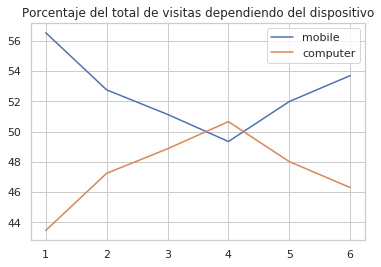

In [48]:
g = months_cantidad.plot()
g.set_title('Porcentaje del total de visitas dependiendo del dispositivo');

# Arranca part de conversion, cambiando cosas del notebook que era de checkouts

In [49]:
conversion = events.loc[events['event'] == 'conversion',['timestamp', 'person','model','condition','storage','color']]
conversion.head()

,timestamp,person,model,condition,storage,color
220,2018-03-20 17:46:12,00204059,Motorola Moto X2,Muy bien,32GB,Couro Vintage
2282,2018-04-26 22:28:53,00c13dee,Samsung Galaxy Core Plus Duos TV,Muy bien,4GB,Blanco
2547,2018-06-10 14:37:50,00fdbb4b,Samsung Galaxy S6 Flat,Muy bien,32GB,Blanco
4245,2018-03-16 13:50:25,0146a9df,iPhone 5s,Bien,32GB,Gris espacial
6985,2018-02-09 22:07:07,01db2fe6,Samsung Galaxy J5,Bien,16GB,Nrego


In [50]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 220 to 1008943
Data columns (total 6 columns):
timestamp    1172 non-null datetime64[ns]
person       1172 non-null object
model        1172 non-null object
condition    1172 non-null object
storage      1172 non-null object
color        1172 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 64.1+ KB


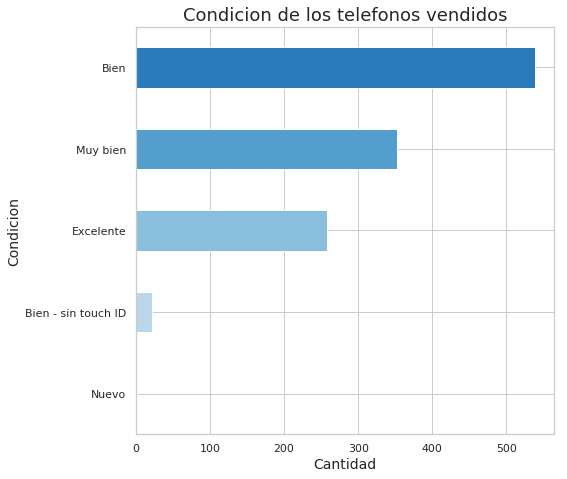

In [51]:
condition_plot = conversion['condition'].value_counts().sort_values(ascending = True).plot.barh(figsize = (7.5,7.5), color=sns.color_palette('Blues'))
condition_plot.set_title('Condicion de los telefonos vendidos',fontsize = 18)
condition_plot.set_ylabel('Condicion',fontsize = 14)
condition_plot.set_xlabel('Cantidad',fontsize = 14);

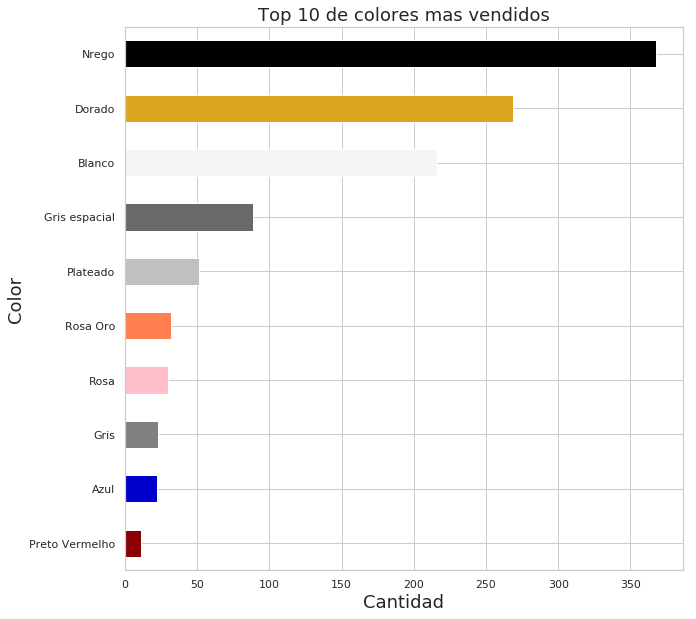

In [55]:
colores = ['#8B0000','#0000CD','#808080','#FFC0CB','#FF7F50','#C0C0C0','#696969','#F5F5F5','#DAA520','#000000']
color_plot = conversion['color'].value_counts().head(10).sort_values().plot.barh(figsize = (10,10), color = sns.color_palette(colores))
color_plot.set_title('Top 10 de colores mas vendidos',fontsize = 18)
color_plot.set_ylabel('Color',fontsize = 18)
color_plot.set_xlabel('Cantidad',fontsize = 18);

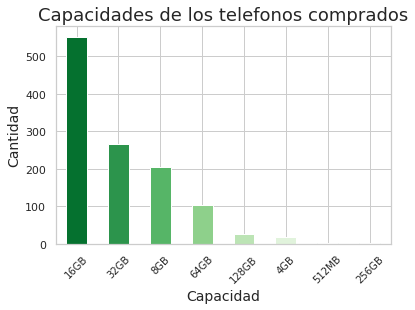

In [53]:
storage_plot = conversion['storage'].value_counts().plot(kind = 'bar' , color=sns.color_palette('Greens_r'))
storage_plot.set_title('Capacidad de los telefonos vendidos',fontsize = 18)
storage_plot.set_xlabel('Capacidad',fontsize = 14)
storage_plot.set_ylabel('Cantidad',fontsize = 14)
storage_plot.set_xticklabels(storage_plot.get_xticklabels(), rotation = 45, fontsize = 10);

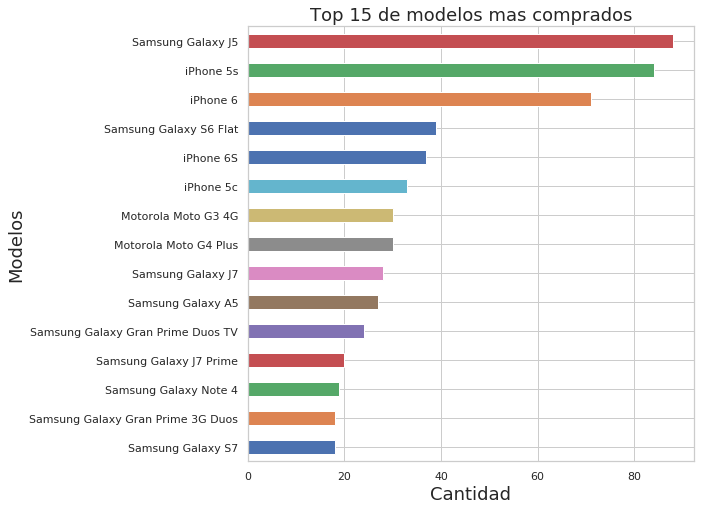

In [19]:
model = conversion['model'].value_counts().head(15).sort_values()
model_plot = model.plot(kind = 'barh', color =sns.color_palette(),figsize = (8,8))
model_plot.set_title('Top 15 de modelos mas comprados',fontsize = 18)
model_plot.set_xlabel('Cantidad',fontsize = 18)
model_plot.set_ylabel('Modelos',fontsize = 18);

In [62]:
galaxy_j5 = conversion[conversion['model'] == 'Samsung Galaxy J5']
galaxy_j5 = galaxy_j5[['storage','condition']]
galaxy_j5 = pd.DataFrame(galaxy_j5.groupby('storage')['condition'].value_counts())
galaxy_j5 = galaxy_j5.rename(columns = {'condition':'cantidad'})
galaxy_j5 = galaxy_j5.reset_index()
galaxy_j5 = galaxy_j5.rename(columns = {'storage':'capacidad'})
galaxy_j5 = galaxy_j5.pivot('capacidad','condition','cantidad')
galaxy_j5.fillna(0)

condition,Bien,Excelente,Muy bien
capacidad,,,
16GB,54.0,7.0,26.0
8GB,1.0,0.0,0.0


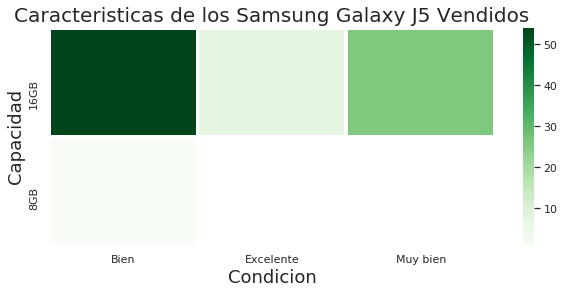

In [59]:
plt.figure(figsize = (10,4))
galaxy_j5_heatmap = sns.heatmap(galaxy_j5,linewidth = 3, cmap = 'Greens')
galaxy_j5_heatmap.set_title('Caracteristicas de los Samsung Galaxy J5 vendidos',Fontsize = 20)
galaxy_j5_heatmap.set_ylabel('Capacidad',Fontsize = 18)
galaxy_j5_heatmap.set_xlabel('Condicion',fontsize = 18);

In [118]:
iPhone5s = conversion[conversion['model'] == 'iPhone 5s']
iPhone5s = iPhone5s[['storage','condition']]
iPhone5s = pd.DataFrame(iPhone5s.groupby('storage')['condition'].value_counts())
iPhone5s = iPhone5s.rename(columns = {'condition':'cantidad'})
iPhone5s = iPhone5s.reset_index()
iPhone5s = iPhone5s.rename(columns = {'storage':'capacidad'})
iPhone5s = iPhone5s.pivot('capacidad','condition','cantidad')
iPhone5s.fillna(0, inplace=True)
iPhone5s = iPhone5s.reindex(['64GB','32GB','16GB'])
iPhone5s

condition,Bien,Bien - sin touch ID,Excelente,Muy bien
capacidad,,,,
64GB,0.0,1.0,0.0,0.0
32GB,10.0,1.0,3.0,8.0
16GB,24.0,7.0,9.0,21.0


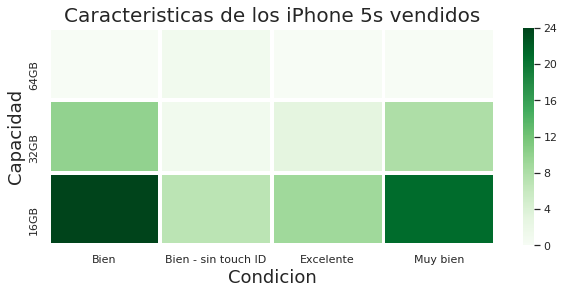

In [119]:
plt.figure(figsize = (10,4))
iPhone5s_heatmap = sns.heatmap(iPhone5s,linewidth = 3, cmap = 'Greens')
iPhone5s_heatmap.set_title('Caracteristicas de los iPhone 5s vendidos',Fontsize = 20)
iPhone5s_heatmap.set_ylabel('Capacidad',Fontsize = 18)
iPhone5s_heatmap.set_xlabel('Condicion',fontsize = 18);

In [120]:
iPhone6 = conversion[conversion['model'] == 'iPhone 6']
iPhone6 = iPhone6[['storage','condition']]
iPhone6 = pd.DataFrame(iPhone6.groupby('storage')['condition'].value_counts())
iPhone6 = iPhone6.rename(columns = {'condition':'cantidad'})
iPhone6 = iPhone6.reset_index()
iPhone6 = iPhone6.rename(columns = {'storage':'capacidad'})
iPhone6 = iPhone6.pivot('capacidad','condition','cantidad')
iPhone6.fillna(0)
iPhone6 = iPhone6.reindex(['128GB','64GB','16GB'])

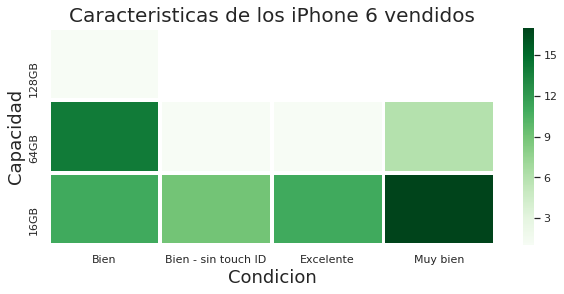

In [121]:
plt.figure(figsize = (10,4))
iPhone6_heatmap = sns.heatmap(iPhone6,linewidth = 3, cmap = 'Greens')
iPhone6_heatmap.set_title('Caracteristicas de los iPhone 6 vendidos',Fontsize = 20)
iPhone6_heatmap.set_ylabel('Capacidad',Fontsize = 18)
iPhone6_heatmap.set_xlabel('Condicion',fontsize = 18);

In [122]:
conversion['person'].value_counts().mean() 

1.6368715083798884

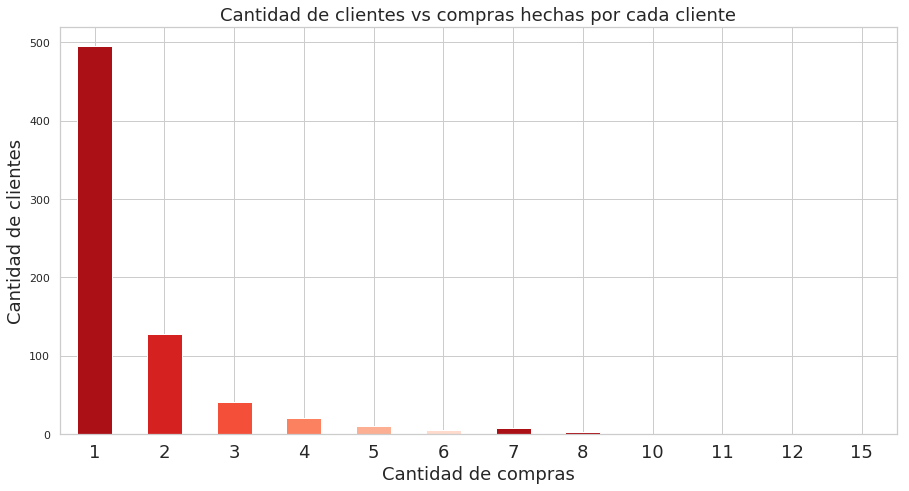

In [23]:
cantidad_plot = conversion['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color=sns.color_palette('Reds_r'),  figsize=(15,7.5) ) # con normalize = True en value_counts se podria mostrar en % 
cantidad_plot.set_title('Cantidad de clientes vs compras hechas por cada cliente',fontsize = 18)
cantidad_plot.set_xlabel('Cantidad de compras',fontsize = 18)
cantidad_plot.set_ylabel('Cantidad de clientes',fontsize = 18);
cantidad_plot.set_xticklabels(cantidad_plot.get_xticklabels(), rotation = 0, fontsize = 18);

In [131]:
dias = conversion['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       184
Tuesday      215
Wednesday    189
Thursday     200
Friday       175
Saturday     106
Sunday       103
Name: timestamp, dtype: int64

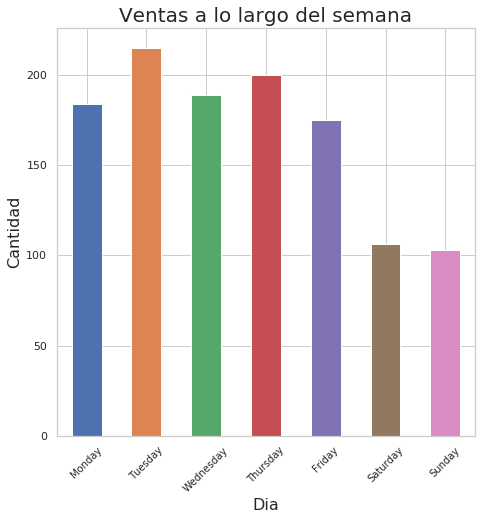

In [133]:
g = dias.plot(kind = 'bar',color=sns.color_palette(),figsize = (7.5,7.5))
g.set_title('Ventas a lo largo del semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

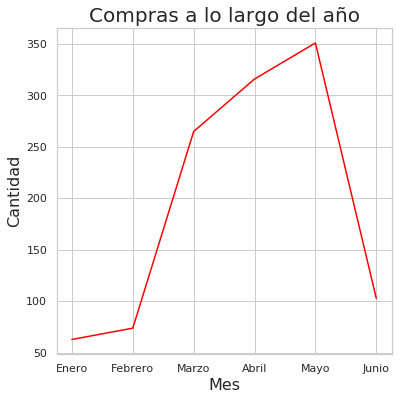

In [141]:
compras_mes = conversion['timestamp'].dt.month.value_counts().sort_index()#este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
compras_mes_plot = compras_mes.plot(color='red',figsize = (6,6))
compras_mes_plot.set_title('Compras a lo largo del año',fontsize = 20)
compras_mes_plot.set_xlabel('Mes',fontsize = 16)
compras_mes_plot.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([1,2,3,4,5,6], ["Enero", "Febrero", "Marzo","Abril","Mayo","Junio"]);

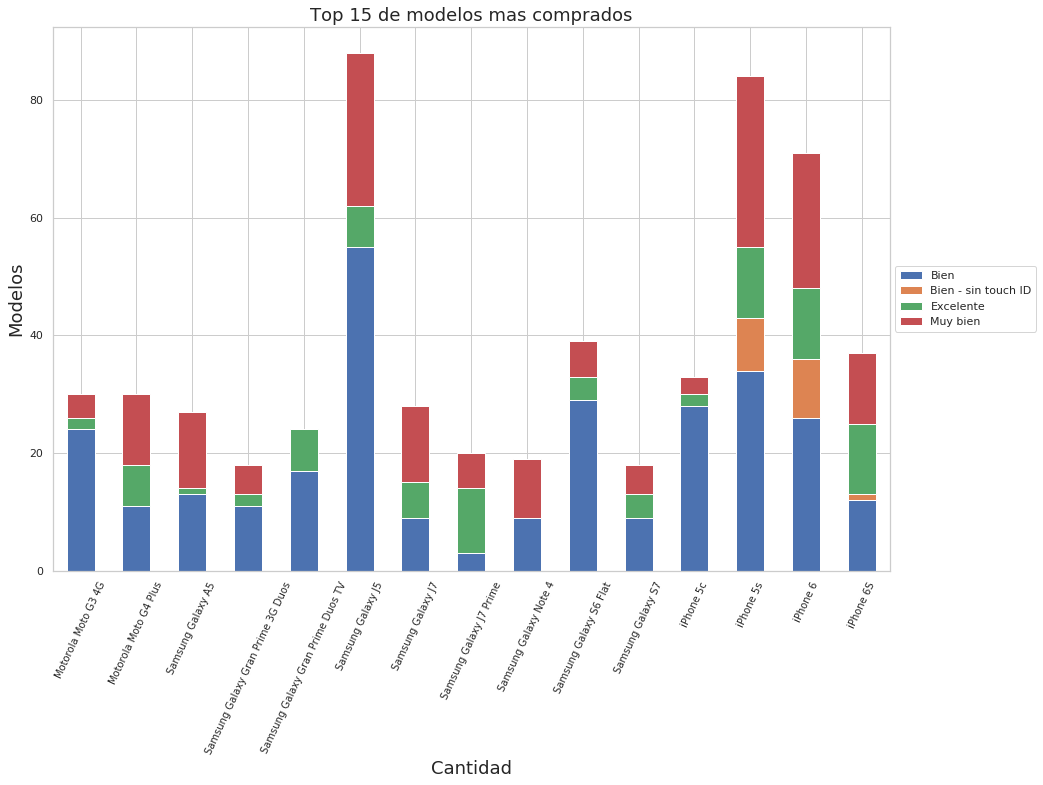

In [136]:
modelos_mas_vendidos = conversion['model'].value_counts().sort_values(ascending = False).head(15).index

model_ = conversion.loc[:,['model','condition']]
model_ = model_.loc[model_['model'].isin(modelos_mas_vendidos)] 
model_2 = model_.groupby(['model','condition']).agg({'condition':'count'}).unstack()
model_2.columns = model_2.columns.droplevel(0)
model_2.fillna(0, inplace = True)

model_plot = model_2.plot.bar(stacked = True, color =sns.color_palette(),figsize = (15,10))
model_plot.set_title('Top 15 de modelos mas comprados',fontsize = 18)
model_plot.set_xlabel('Cantidad',fontsize = 18)
model_plot.set_ylabel('Modelos',fontsize = 18)
model_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
model_plot.set_xticklabels(model_plot.get_xticklabels(), rotation = 65, fontsize = 10);

In [147]:
conversion_mes_dia = events.loc[events['event'] == 'conversion',['timestamp','person', 'dia', 'mes']]
conversion_mes_dia.head()

,timestamp,person,dia,mes
220,2018-03-20 17:46:12,00204059,20,3
2282,2018-04-26 22:28:53,00c13dee,26,4
2547,2018-06-10 14:37:50,00fdbb4b,10,6
4245,2018-03-16 13:50:25,0146a9df,16,3
6985,2018-02-09 22:07:07,01db2fe6,9,2


In [155]:
quincenas_conversion = conversion_mes_dia.groupby(['mes', 'dia']).agg({'timestamp':'count'})
quincenas_conversion = quincenas_conversion.reset_index()
quincenas_conversion['quincena'] = np.where(quincenas_conversion['dia'] <= 15, '1', '2')
quincenas_conversion = quincenas_conversion.groupby(['mes', 'quincena']).agg({'timestamp':'sum'})
quincenas_conversion.columns = ['busquedas']
quincenas_conversion

busquedas
mes quincena           
1   1                29
    2                34
2   1                40
    2                34
3   1               104
    2               161
4   1               140
    2               176
5   1               247
    2               104
6   1               103

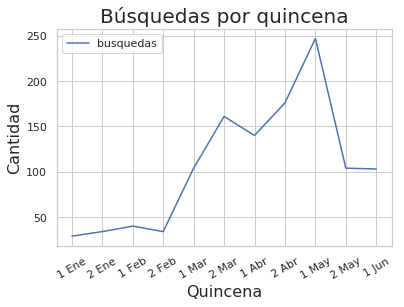

In [156]:
conversion_quincena_plot = quincenas_conversion.plot()
conversion_quincena_plot.set_title('Búsquedas por quincena',fontsize = 20)
conversion_quincena_plot.set_xlabel('Quincena',fontsize = 16)
conversion_quincena_plot.set_ylabel('Cantidad',fontsize = 16)
plt.xticks([0,1, 2,3, 4, 5, 6,7,8,9,10], ["1 Ene","2 Ene","1 Feb","2 Feb","1 Mar","2 Mar","1 Abr","2 Abr","1 May",
                                         "2 May","1 Jun"], rotation=30); 